# Training and Model Evaluation
Training the data (csv file) with the Multiple Model after applying Feature Reduction techniques like **Principal Component Analysis** and **Standard Scaler** to negate and reduce the Dimensionality of the data.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Packages

In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

## Data collection (CSV File)

In [9]:
data=pd.read_csv("/content/drive/MyDrive/Github/Medicinal Plant Detection Using Machine Learning/Data/ExtractedFeatures.csv")

In [10]:
data

,LBP_Feature_1,LBP_Feature_2,LBP_Feature_3,LBP_Feature_4,LBP_Feature_5,LBP_Feature_6,LBP_Feature_7,LBP_Feature_8,LBP_Feature_9,GLCM_Feature_Dissimilarity,...,Mean_R,Var_R,Skew_R,Mean_G,Var_G,Skew_G,Mean_B,Var_B,Skew_B,Label
0,0.027994,0.069837,0.018527,0.094523,0.070229,0.161165,0.069341,0.097861,0.390523,1.315370,...,15.862588,568.844559,1.797773,21.068242,867.985941,1.153764,9.720084,304.414832,3.367585,Bellyache bush (Green)
1,0.035107,0.077375,0.020802,0.091493,0.069175,0.147587,0.072821,0.100051,0.385590,1.541173,...,20.941332,799.555744,1.192635,25.101884,1079.680481,0.888754,11.037473,338.580671,3.163192,Bellyache bush (Green)
2,0.024717,0.068902,0.015160,0.095858,0.061750,0.165130,0.071451,0.098987,0.398044,1.015514,...,13.047573,438.424098,1.899293,17.258159,687.776815,1.276937,7.574794,212.321602,4.026185,Bellyache bush (Green)
3,0.055080,0.102960,0.030774,0.078403,0.062366,0.105536,0.084563,0.104321,0.375998,1.848266,...,14.164750,532.220768,1.809078,17.819565,779.015558,1.344897,7.084845,219.530270,4.779979,Bellyache bush (Green)
4,0.027034,0.067895,0.016363,0.093636,0.064696,0.161530,0.067177,0.098934,0.402735,1.276336,...,12.249544,436.688477,2.245516,16.183751,663.958488,1.485639,7.494372,236.579771,4.175034,Bellyache bush (Green)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.012088,0.017700,0.009490,0.014483,0.013968,0.020210,0.014567,0.018409,0.879084,0.640441,...,13.839704,1072.098142,2.428298,15.748247,1347.237405,2.177858,4.592833,231.230836,8.805814,Trigonella Foenum-graecum (Fenugreek)
1812,0.006046,0.010284,0.005926,0.011109,0.012515,0.017398,0.010056,0.011053,0.915614,0.375903,...,9.076615,785.043005,3.481602,10.705626,1027.139284,2.981260,4.022584,230.583898,7.690323,Trigonella Foenum-graecum (Fenugreek)
1813,0.007656,0.014827,0.009302,0.020337,0.022640,0.029843,0.017621,0.016470,0.861305,0.526366,...,17.027024,1486.579019,2.121477,19.979577,1996.953958,1.946036,5.280974,248.553693,8.235564,Trigonella Foenum-graecum (Fenugreek)
1814,0.007229,0.013236,0.006933,0.014331,0.013291,0.021095,0.013214,0.014211,0.896459,0.398143,...,12.089983,1014.167195,2.662396,14.855094,1485.915583,2.394971,3.701817,181.054805,10.495481,Trigonella Foenum-graecum (Fenugreek)


In [11]:
len(list(data['Label'].unique()))

29

## Data Split

In [12]:
X = data.drop('Label', axis=1)
y = data['Label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [14]:
y.unique()

array(['Bellyache bush (Green)', 'Alpinia Galanga (Rasna)',
       'Amaranthus Viridis (Arive-Dantu)',
       'Artocarpus Heterophyllus (Jackfruit)',
       'Azadirachta Indica (Neem)', 'Basella Alba (Basale)',
       'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)',
       'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)',
       'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis',
       'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)',
       'Moringa Oleifera (Drumstick)',
       'Muntingia Calabura (Jamaica Cherry-Gasagase)',
       'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)',
       'Nyctanthes Arbor-tristis (Parijata)', 'Piper Betle (Betel)',
       'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)',
       'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)',
       'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)',
       'Tabernaemontana Divaricata (Crape Jasmine)',
       'Trigonella Foen

## Feature Reduction and Multiple Model Training

**Principal Component Analysis** and **Standard Scaler** is applied to pick the Correlated Feature and Train along Multiple Models: Random Forest, **Support Vector Machine**, K-Nearest Neighbors, Neural Network (MLP), Logistic Regression, Decision Tree, Naive Bayes (Gaussian), AdaBoost, Linear Discriminant Analysis, Quadratic Discriminant Analysis

Best Model is chosen with the derived result

In [15]:
n_components = 53
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine' : SVC(kernel='linear',C=10, gamma=0.1),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes (Gaussian)': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}

accuracy_results = {}
di={}
maxacc=0
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    predictions = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    di[classifier_name]=accuracy
    if(accuracy>maxacc):
      maxacc=accuracy
      best_classifier=classifier
      best_classifier_name=classifier_name
    print(classifier_name,accuracy)

print("Best Classifier : ",best_classifier_name)
print("Accuracy :",maxacc)

Random Forest 0.967032967032967
Support Vector Machine 0.989010989010989
K-Nearest Neighbors 0.9560439560439561
Neural Network (MLP) 0.967032967032967
Logistic Regression 0.978021978021978
Decision Tree 0.7582417582417582
Naive Bayes (Gaussian) 0.9340659340659341
AdaBoost 0.10989010989010989
Linear Discriminant Analysis 0.9230769230769231
Quadratic Discriminant Analysis 0.03296703296703297
Best Classifier :  Support Vector Machine
Accuracy : 0.989010989010989


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Visualization of the Model Performance

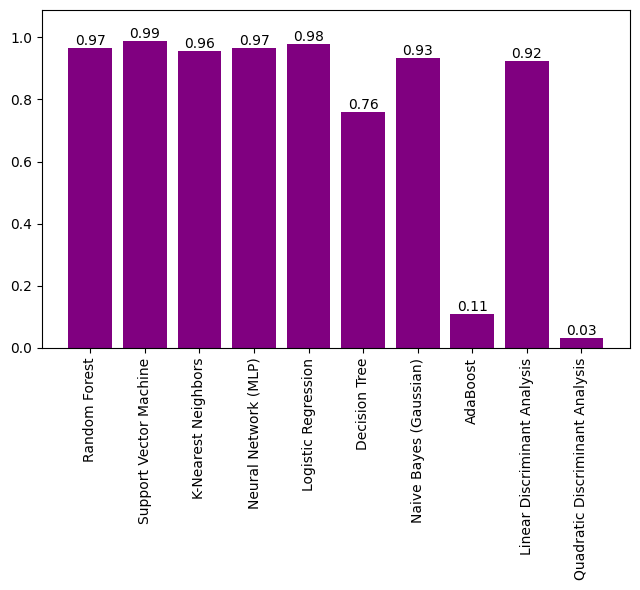

In [16]:
names = list(di.keys())
values = list(di.values())
plt.figure(figsize=(6.5, 6))
  # Adjust figure size as needed
bars = plt.bar(names, values, color='purple')

# Display y-values at the top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value,'{:.2f}'.format(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, max(values) * 1.1)
plt.show()


In [17]:
n_components = 53
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

svm = SVC(kernel='linear',C=10, gamma=0.1)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Support Vector Machine")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Support Vector Machine
Accuracy: 0.989010989010989
Classification Report:
                                              precision    recall  f1-score   support

                     Alpinia Galanga (Rasna)       1.00      1.00      1.00         2
            Amaranthus Viridis (Arive-Dantu)       0.83      1.00      0.91         5
        Artocarpus Heterophyllus (Jackfruit)       1.00      1.00      1.00         4
                   Azadirachta Indica (Neem)       1.00      1.00      1.00         2
                       Basella Alba (Basale)       1.00      1.00      1.00         6
                      Bellyache bush (Green)       1.00      1.00      1.00         3
            Brassica Juncea (Indian Mustard)       1.00      1.00      1.00         2
                  Carissa Carandas (Karanda)       1.00      1.00      1.00         7
                        Citrus Limon (Lemon)       1.00      1.00      1.00         4
             Ficus Auriculata (Roxburgh fig)       1.00      1.00

## Saving the Model

In [18]:
with open('/content/Best_Model.pkl', 'wb') as files:
    pickle.dump(best_classifier, files)

In [19]:
with open('/content/pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

In [20]:
with open('/content/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)